# Image classification using VGG16 from Scratch

In [1]:
import os
import xml.etree.ElementTree as ET
import numpy as np

import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sn

### Load Dataset

In [2]:
CLASS_LABEL_MAP = {'crosswalk': 0, 'speedlimit': 1, 'stop': 2, 'trafficlight': 3}

In [3]:
def load_dataset():
    # directory paths
    img_dir = "Dataset/images"
    ann_dir = "Dataset/annotations"

    images = []
    labels = []

    for img_name in os.listdir(img_dir):
        # Load image
        img_path = os.path.join(img_dir, img_name)
        image = load_img(img_path, target_size=(224, 224))
        image = img_to_array(image)
        image = image / 255.0 # Normalize to be in the range 0-1

        # Load corresponding annotation
        ann_path = os.path.join(ann_dir, img_name.replace('.png', '.xml'))
        tree = ET.parse(ann_path)
        root = tree.getroot()
        label = root.find("object").find("name").text  # Extract object label

        images.append(image)
        labels.append(CLASS_LABEL_MAP[label]) # Convert string label to numeric

    return np.array(images), np.array(labels)

In [4]:
X, y = load_dataset()

In [5]:
X.shape, y.shape

((877, 224, 224, 3), (877,))

### Train-test split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
X_train.shape, X_test.shape

((701, 224, 224, 3), (176, 224, 224, 3))

### Model Definition

<img src="./VGG16 Architecture.png">

<a href="https://neurohive.io/en/popular-networks/vgg16/">Architecture reference blog: Neurohive VGG16</a>


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam

In [29]:
vgg16_model = Sequential([
    Input(shape=(224, 224, 3)),
    
    # Block 1
    Conv2D(64, kernel_size=(3, 3), padding="same", activation="relu"),
    Conv2D(64, kernel_size=(3, 3), padding="same", activation="relu"),
    MaxPooling2D((2, 2), strides=(2, 2)),

    # Block 2
    Conv2D(128, kernel_size=(3, 3), padding="same", activation="relu"),
    Conv2D(128, kernel_size=(3, 3), padding="same", activation="relu"),
    MaxPooling2D((2, 2), strides=(2, 2)),

    # Block 3
    Conv2D(256, kernel_size=(3, 3), padding="same", activation="relu"),
    Conv2D(256, kernel_size=(3, 3), padding="same", activation="relu"),
    Conv2D(256, kernel_size=(3, 3), padding="same", activation="relu"),
    MaxPooling2D((2, 2), strides=(2, 2)),

    # Block 4
    Conv2D(512, kernel_size=(3, 3), padding="same", activation="relu"),
    Conv2D(512, kernel_size=(3, 3), padding="same", activation="relu"),
    Conv2D(512, kernel_size=(3, 3), padding="same", activation="relu"),
    MaxPooling2D((2, 2), strides=(2, 2)),

    # Block 5
    Conv2D(512, kernel_size=(3, 3), padding="same", activation="relu"),
    Conv2D(512, kernel_size=(3, 3), padding="same", activation="relu"),
    Conv2D(512, kernel_size=(3, 3), padding="same", activation="relu"),
    MaxPooling2D((2, 2), strides=(2, 2)),

    # Dense layers
    Flatten(),
    Dense(4096, activation="relu"),
    Dense(4096, activation="relu"),
    Dense(4, activation="softmax")
])

In [30]:
vgg16_model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_37 (Conv2D)                   │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_38 (Conv2D)                   │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_39 (Conv2D)                   │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_40 (Conv2D)                   │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_41 (Conv2D)                   │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_42 (Conv2D)                   │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_43 (Conv2D)                   │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_44 (Conv2D)                   │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_45 (Conv2D)                   │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_46 (Conv2D)                   │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_47 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_48 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_49 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 134,276,932 (512.23 MB)

 Trainable params: 134,276,932 (512.23 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
vgg16_model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Model Training

In [32]:
# Model training
history = vgg16_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=8)

Epoch 1/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 655s 7s/step - accuracy: 0.6889 - loss: 18.0259 - val_accuracy: 0.6818 - val_loss: 0.9886
Epoch 2/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 642s 7s/step - accuracy: 0.7378 - loss: 0.8817 - val_accuracy: 0.6818 - val_loss: 0.9794
Epoch 3/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 635s 7s/step - accuracy: 0.7515 - loss: 0.8555 - val_accuracy: 0.6818 - val_loss: 0.9869
Epoch 4/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 645s 7s/step - accuracy: 0.7377 - loss: 0.8826 - val_accuracy: 0.6818 - val_loss: 0.9903
Epoch 5/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 624s 7s/step - accuracy: 0.7602 - loss: 0.8227 - val_accuracy: 0.6818 - val_loss: 0.9818


### Model Evaluation

In [33]:
# Test accuracy
vgg16_model.evaluate(X_test, y_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 33s 5s/step - accuracy: 0.6565 - loss: 1.0320


[0.9818475246429443, 0.6818181872367859]

In [34]:
y_predicted = vgg16_model.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 32s 5s/step


In [35]:
# Converting probabilities to discrete integers
y_predicted = [np.argmax(element) for element in y_predicted]
y_predicted[:5]

[1, 1, 1, 1, 1]

In [36]:
print(classification_report(y_test, y_predicted, target_names=CLASS_LABEL_MAP.keys()))

              precision    recall  f1-score   support

   crosswalk       0.00      0.00      0.00        22
  speedlimit       0.68      1.00      0.81       120
        stop       0.00      0.00      0.00        22
trafficlight       0.00      0.00      0.00        12

    accuracy                           0.68       176
   macro avg       0.17      0.25      0.20       176
weighted avg       0.46      0.68      0.55       176



C:\Users\HP USER\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP USER\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP USER\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

Text(45.722222222222214, 0.5, 'Truth')

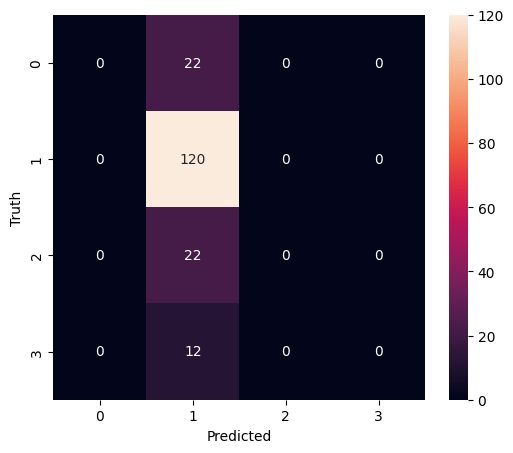

In [37]:
cm = confusion_matrix(y_test, y_predicted)

plt.figure(figsize = (6,5))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')